<center><h1>Iris Dataset Classification using SVM</h1><center>

#### Importing the libraries and datasets

In [1]:
#importing libraries

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### loading the dataset

In [2]:
iris = datasets.load_iris() #loading the iris dataset
print(iris.data) #printing the data
print(iris.target) #printing the target
print(iris.feature_names) #printing the feature names
print(iris.target_names) #printing the target names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### Checking for missing values

In [4]:
data = iris.data #assigning the data to a variable
target = iris.target #assigning the target to a variable

missing_values = np.isnan(data) #checking for missing values
has_missing_values = np.any(missing_values) #checking if there are any missing values

if has_missing_values:
    print("There are missing values in the data.")
else:
    print("There are no missing values in the data.")


There are no missing values in the data.


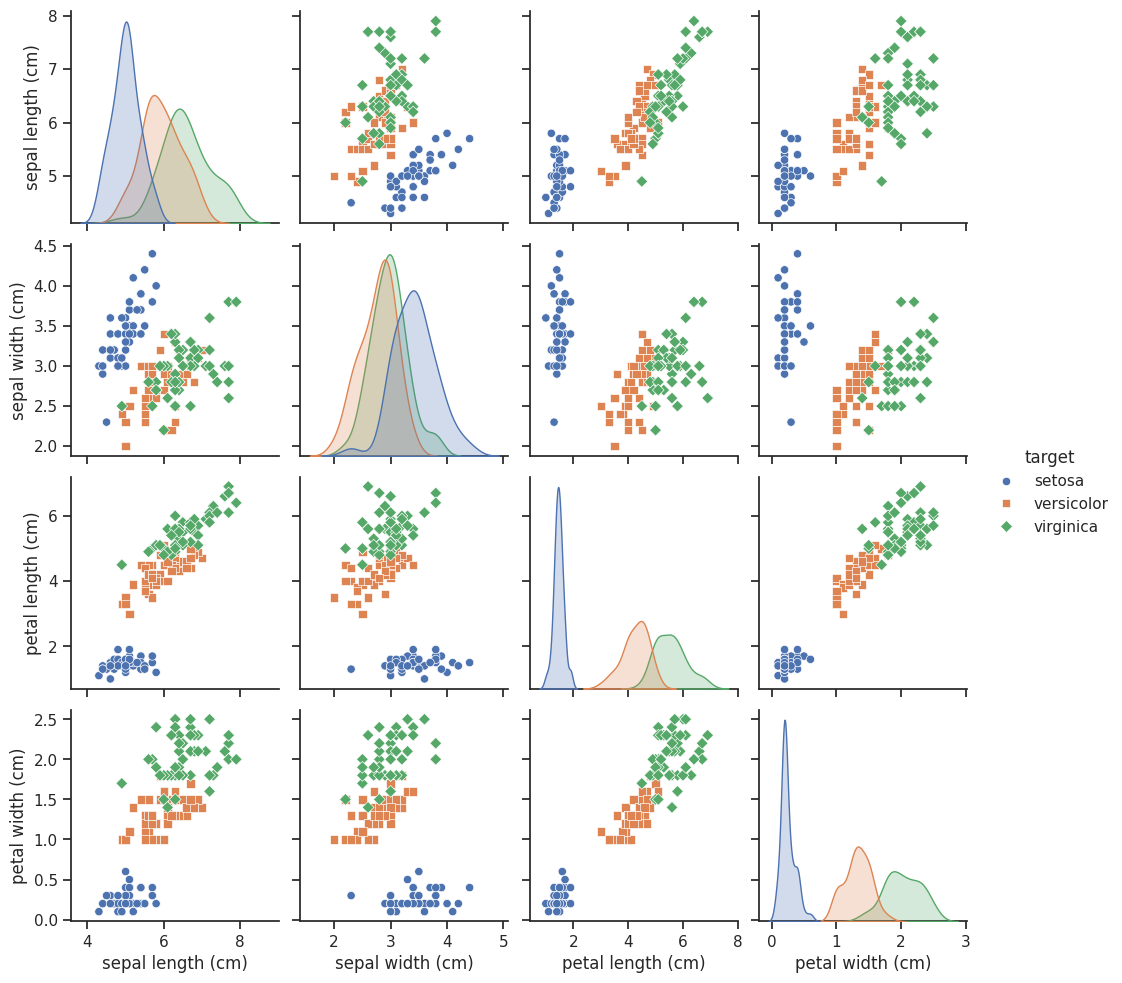

In [5]:
# Create a dataframe with data and target
df = pd.DataFrame(data, columns=iris.feature_names)
df['target'] = iris.target_names[target]

# Plot the graphs
sns.set(style="ticks")
sns.pairplot(df, hue="target", markers=["o", "s", "D"])

#### Scaling the data

In [6]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Scale the data using the scaler
scaled_data = scaler.fit_transform(data)

# Print the scaled data
print(scaled_data)


[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

#### Plotting the Scaled data

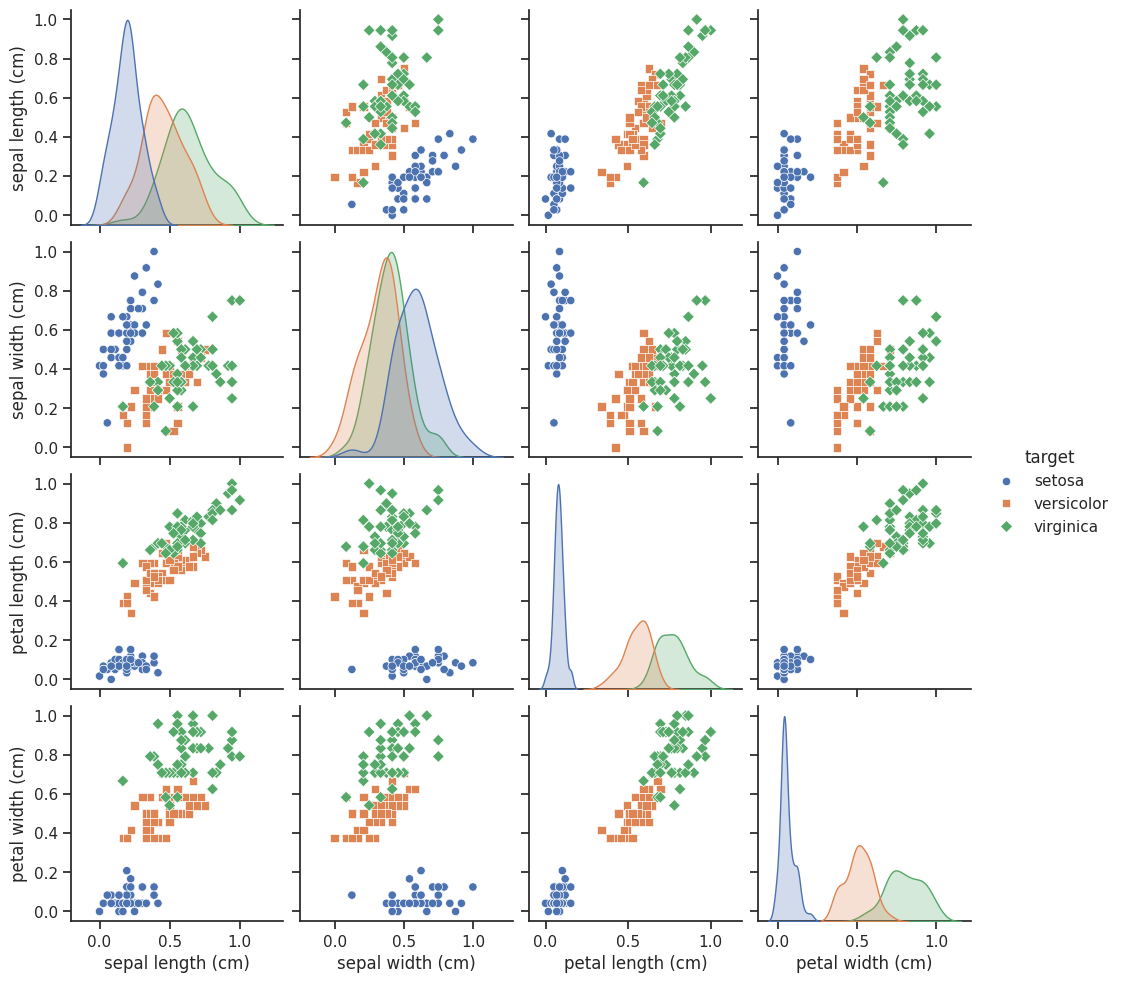

In [7]:
# Create a dataframe with data and target
df = pd.DataFrame(scaled_data, columns=iris.feature_names)
df['target'] = iris.target_names[target]

# Plot the graphs
sns.set(style="ticks")
sns.pairplot(df, hue="target", markers=["o", "s", "D"])

#### Scaling the data and training using different SVM kernals and doing evaluation metrics for each type of classification

In [9]:
X = iris.data  # Select the features
y = iris.target # Select the target

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
y_predicted = []

# Iterate over each kernel
for i, kernel in enumerate(kernels):
    # Fit the SVM model
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_predicted.append(y_pred)    

# Calculate evaluation metrics for different SVM configurations
accuracy_linear = accuracy_score(y_test, y_predicted[0])
precision_linear = precision_score(y_test, y_predicted[0], average='macro')
recall_linear = recall_score(y_test, y_predicted[0], average='macro')
f1_score_linear = f1_score(y_test, y_predicted[0], average='macro')

accuracy_poly = accuracy_score(y_test, y_predicted[1])
precision_poly = precision_score(y_test, y_predicted[1], average='macro')
recall_poly = recall_score(y_test, y_predicted[1], average='macro')
f1_score_poly = f1_score(y_test, y_predicted[1], average='macro')

accuracy_rbf = accuracy_score(y_test, y_predicted[2])
precision_rbf = precision_score(y_test, y_predicted[2], average='macro')
recall_rbf = recall_score(y_test, y_predicted[2], average='macro')
f1_score_rbf = f1_score(y_test, y_predicted[2], average='macro')

accuracy_sigmoid = accuracy_score(y_test, y_predicted[3])
precision_sigmoid = precision_score(y_test, y_predicted[3], average='macro')
recall_sigmoid = recall_score(y_test, y_predicted[3], average='macro')
f1_score_sigmoid = f1_score(y_test, y_predicted[3], average='macro')

# Print the evaluation metrics for different SVM configurations
print("Evaluation Metrics for Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_score_linear)
print()

print("Evaluation Metrics for Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_score_poly)
print()

print("Evaluation Metrics for RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_score_rbf)
print()

print("Evaluation Metrics for Sigmoid Kernel:")
print("Accuracy:", accuracy_sigmoid)
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1-score:", f1_score_sigmoid)


Evaluation Metrics for Linear Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Evaluation Metrics for Polynomial Kernel:
Accuracy: 0.9333333333333333
Precision: 0.9326599326599326
Recall: 0.9326599326599326
F1-score: 0.9326599326599326

Evaluation Metrics for RBF Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Evaluation Metrics for Sigmoid Kernel:
Accuracy: 0.36666666666666664
Precision: 0.32575757575757575
Recall: 0.3962962962962963
F1-score: 0.3575757575757576


#### K-fold Cross Validation for different kernals with k = 5 and 10

In [11]:
# Shuffle the data
np.random.shuffle(data)

# Split features and labels
X = iris.data
y = iris.target

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-fold cross-validation for different kernels and k values
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Define k-fold cross-validation
kf_5 = KFold(n_splits=5, shuffle=True)
kf_10 = KFold(n_splits=10, shuffle=True)

for kernel in kernels:
    svc = SVC(kernel=kernel)
    print(f"Mean accuracy for kernel: {kernel} and k=5 is {np.mean(cross_val_score(svc, X_scaled, y, cv=kf_5)):.2f} and k=10 is {np.mean(cross_val_score(svc, X_scaled, y, cv=kf_10)):.2f}")


Mean accuracy for kernel: linear and k=5 is 0.96 and k=10 is 0.97
Mean accuracy for kernel: poly and k=5 is 0.94 and k=10 is 0.97
Mean accuracy for kernel: rbf and k=5 is 0.96 and k=10 is 0.96
Mean accuracy for kernel: sigmoid and k=5 is 0.34 and k=10 is 0.32


#### Dimensionality reducing and Scaling the data and training using different SVM kernals and doing evaluation metrics for each type of classification

In [12]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
y_predicted = []

# Iterate over each kernel
for i, kernel in enumerate(kernels):
    # Fit the SVM model
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_predicted.append(y_pred)    

# Calculate evaluation metrics for different SVM configurations
accuracy_linear = accuracy_score(y_test, y_predicted[0])
precision_linear = precision_score(y_test, y_predicted[0], average='macro')
recall_linear = recall_score(y_test, y_predicted[0], average='macro')
f1_score_linear = f1_score(y_test, y_predicted[0], average='macro')

accuracy_poly = accuracy_score(y_test, y_predicted[1])
precision_poly = precision_score(y_test, y_predicted[1], average='macro')
recall_poly = recall_score(y_test, y_predicted[1], average='macro')
f1_score_poly = f1_score(y_test, y_predicted[1], average='macro')

accuracy_rbf = accuracy_score(y_test, y_predicted[2])
precision_rbf = precision_score(y_test, y_predicted[2], average='macro')
recall_rbf = recall_score(y_test, y_predicted[2], average='macro')
f1_score_rbf = f1_score(y_test, y_predicted[2], average='macro')

accuracy_sigmoid = accuracy_score(y_test, y_predicted[3])
precision_sigmoid = precision_score(y_test, y_predicted[3], average='macro')
recall_sigmoid = recall_score(y_test, y_predicted[3], average='macro')
f1_score_sigmoid = f1_score(y_test, y_predicted[3], average='macro')

# Print the evaluation metrics for different SVM configurations
print("Evaluation Metrics for Linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Precision:", precision_linear)
print("Recall:", recall_linear)
print("F1-score:", f1_score_linear)
print()

print("Evaluation Metrics for Polynomial Kernel:")
print("Accuracy:", accuracy_poly)
print("Precision:", precision_poly)
print("Recall:", recall_poly)
print("F1-score:", f1_score_poly)
print()

print("Evaluation Metrics for RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Precision:", precision_rbf)
print("Recall:", recall_rbf)
print("F1-score:", f1_score_rbf)
print()

print("Evaluation Metrics for Sigmoid Kernel:")
print("Accuracy:", accuracy_sigmoid)
print("Precision:", precision_sigmoid)
print("Recall:", recall_sigmoid)
print("F1-score:", f1_score_sigmoid)

Evaluation Metrics for Linear Kernel:
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9696969696969697
F1-score: 0.9665831244778612

Evaluation Metrics for Polynomial Kernel:
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9696969696969697
F1-score: 0.9665831244778612

Evaluation Metrics for RBF Kernel:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Evaluation Metrics for Sigmoid Kernel:
Accuracy: 0.8
Precision: 0.8021978021978023
Recall: 0.7912457912457912
F1-score: 0.7916666666666666


#### Plotting the decision boundary between first two features and training on them

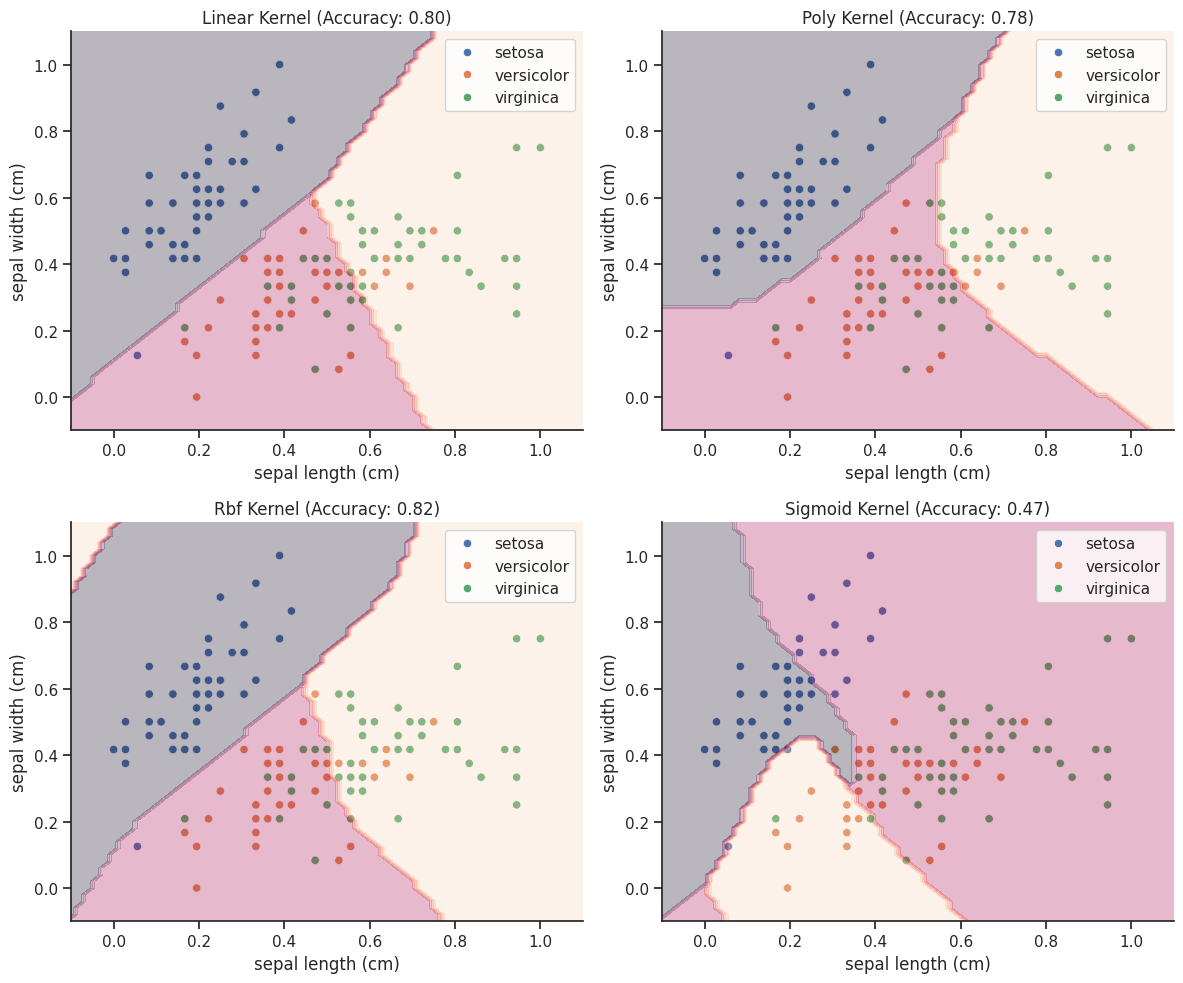

In [13]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select only the first two features
y = iris.target

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create subplots for each kernel
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Iterate over each kernel
for i, kernel in enumerate(kernels):
    # Fit the SVM model
    model = SVC(kernel=kernel)
    model.fit(X_scaled, y)

    # Make predictions
    y_pred = model.predict(X_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    # Plot the decision boundary
    ax = axs[i]
    ax.set_title(f'{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=iris.target_names[y], ax=ax)
    sns.despine()

    # Create a meshgrid to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
    y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

plt.tight_layout()
plt.show()


#### Plotting the decision boundary based on the data which is reduced dimesionally and training this using different SVM kernals.

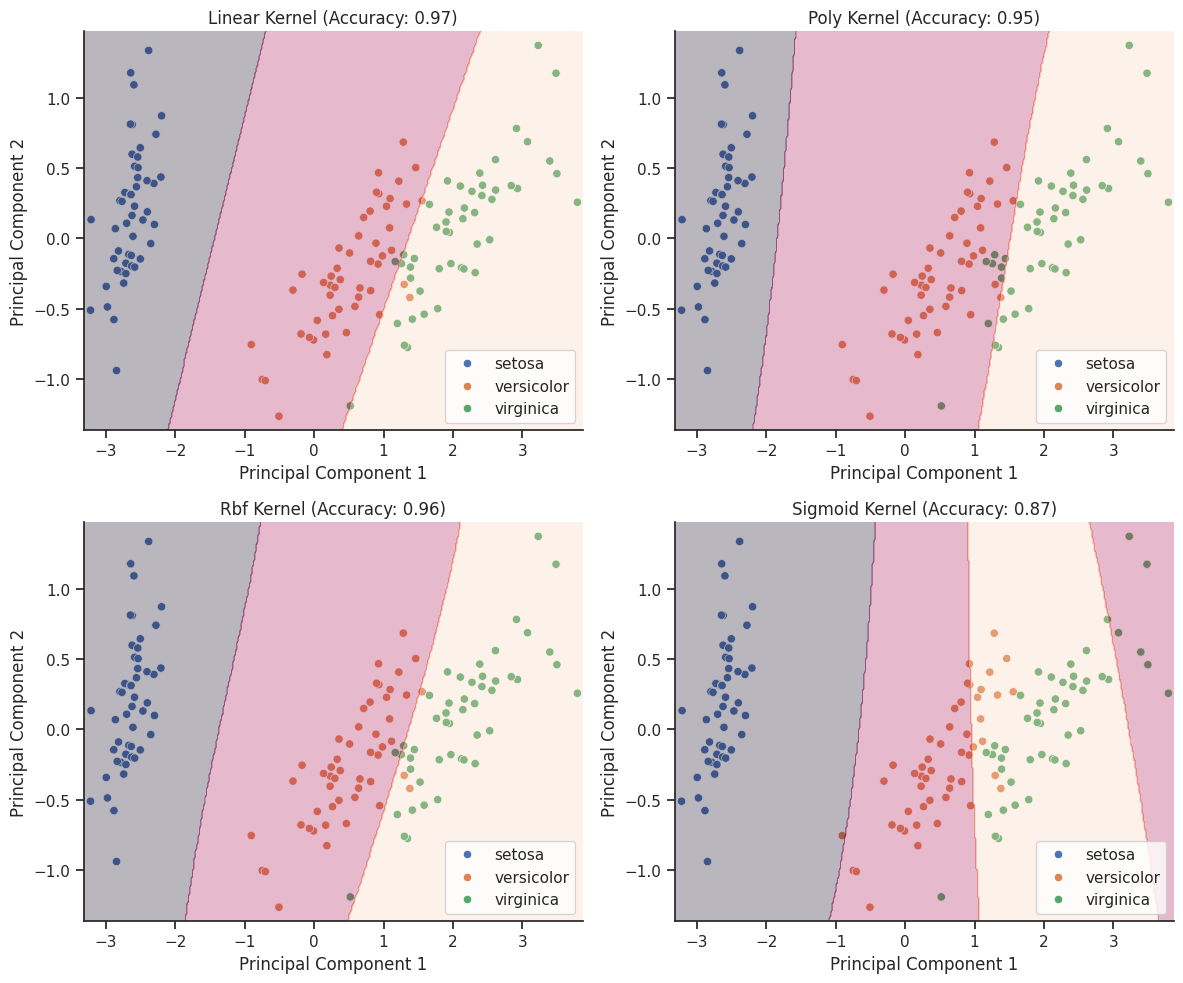

In [25]:
# Perform PCA on the dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Iterate over each kernel
for i, kernel in enumerate(kernels):
    # Fit the SVM model
    model = SVC(kernel=kernel)
    model.fit(X_pca, y)

    # Make predictions
    y_pred = model.predict(X_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y, y_pred)

    # Plot the decision boundary
    ax = axs[i]
    ax.set_title(f'{kernel.capitalize()} Kernel (Accuracy: {accuracy:.2f})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], ax=ax)
    sns.despine()

    # Create a meshgrid to plot the decision boundary
    h = 0.02  # Step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
    y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)

plt.tight_layout()
plt.show()
